In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

In [3]:
df0 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mall Customer Segmentation/Mall_Customers.csv')

In [4]:
df0

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df0 = df0.drop(['CustomerID'], axis=1)

In [7]:
df0['Gender'] = df0['Gender'].map({'Male': 1, 'Female': 0})

In [9]:
df1 = df0.copy()

In [11]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
scaler.fit(df1)
inputs_scaled = pd.DataFrame(scaler.fit_transform(df1), index=df1.index, columns=df1.columns)

In [16]:
inputs_scaled

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


In [17]:
from sklearn.cluster import KMeans

In [18]:
wcss = []

for i in range(1,30):
  kmeans = KMeans(i)
  kmeans.fit(inputs_scaled)
  wcss_val = kmeans.inertia_
  wcss.append(wcss_val)

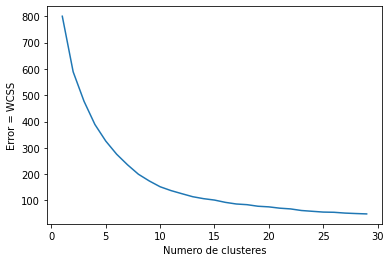

In [20]:
plt.plot(range(1,30), wcss)
plt.xlabel('Numero de clusteres')
plt.ylabel('Error = WCSS')
plt.show()

In [21]:
kmeans = KMeans(8)
kmeans.fit(inputs_scaled)
results = kmeans.fit_predict(inputs_scaled)

In [22]:
results

array([4, 4, 2, 2, 2, 2, 5, 2, 1, 2, 1, 2, 5, 2, 4, 4, 2, 4, 1, 2, 4, 4,
       5, 4, 5, 4, 5, 4, 5, 2, 1, 2, 1, 4, 5, 2, 5, 2, 5, 2, 5, 4, 1, 2,
       5, 2, 5, 2, 2, 2, 5, 4, 2, 1, 5, 1, 5, 1, 2, 1, 1, 4, 5, 5, 1, 4,
       5, 5, 4, 2, 1, 5, 5, 5, 1, 4, 5, 4, 2, 5, 1, 4, 1, 5, 2, 1, 5, 2,
       2, 5, 5, 4, 1, 5, 2, 4, 5, 2, 1, 4, 2, 5, 1, 4, 1, 2, 5, 1, 1, 1,
       1, 2, 6, 4, 2, 2, 5, 5, 5, 5, 4, 6, 0, 7, 6, 0, 3, 7, 1, 7, 3, 7,
       6, 0, 3, 0, 6, 7, 3, 0, 6, 7, 6, 0, 3, 7, 3, 0, 6, 7, 3, 7, 6, 0,
       6, 0, 3, 0, 3, 0, 6, 0, 3, 0, 3, 0, 3, 0, 6, 7, 3, 7, 3, 7, 6, 0,
       3, 7, 3, 7, 6, 0, 3, 0, 6, 7, 6, 7, 6, 0, 6, 0, 3, 0, 6, 0, 6, 7,
       3, 7], dtype=int32)

In [23]:
inputs_scaled

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


In [24]:
from sklearn.decomposition import PCA

In [25]:
pca = PCA(2)

In [26]:
reduced_df = pd.DataFrame(pca.fit_transform(inputs_scaled), columns=['PC1', 'PC2'])
reduced_df

,PC1,PC2
0,-0.406383,-0.520714
1,-1.427673,-0.367310
2,0.050761,-1.894068
3,-1.694513,-1.631908
4,-0.313108,-1.810483
...,...,...
195,-1.179572,1.324568
196,0.672751,1.221061
197,-0.723719,2.765010
198,0.767096,2.861930


In [27]:
reduced_df['cluster'] = results
reduced_df

,PC1,PC2,cluster
0,-0.406383,-0.520714,4
1,-1.427673,-0.367310,4
2,0.050761,-1.894068,2
3,-1.694513,-1.631908,2
4,-0.313108,-1.810483,2
...,...,...,...
195,-1.179572,1.324568,0
196,0.672751,1.221061,6
197,-0.723719,2.765010,7
198,0.767096,2.861930,3


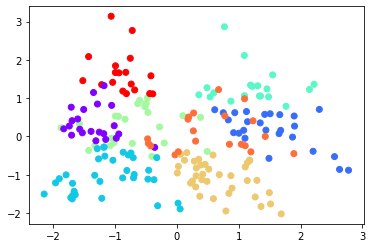

In [30]:
plt.scatter(reduced_df['PC1'], reduced_df['PC2'], c=reduced_df['cluster'], cmap='rainbow')